In [1]:
import pandas as pd
import numpy as np
import string
from textblob import TextBlob
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('Titanic.csv')

In [3]:
df.shape

(891, 12)

In [4]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [6]:
df['PassengerId'].value_counts()

1      1
599    1
588    1
589    1
590    1
      ..
301    1
302    1
303    1
304    1
891    1
Name: PassengerId, Length: 891, dtype: int64

In [7]:
# Checking for no. of unique values in 'PassengerId'

df['PassengerId'].nunique()

891

In [8]:
# Dropping 'PassengerId' column

df = df.drop('PassengerId', axis = 1)

All the 891 values are distinct. Too much variation. Drop 'PassengerId'.

In [9]:
# Checking for distinct values in 'Pclass'

df['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

Not too much variation. Can keep 'Pclass'.

In [10]:
# Checking for distinct values in 'Age'

df['Age'].value_counts()

24.00    30
22.00    27
18.00    26
28.00    25
19.00    25
         ..
55.50     1
74.00     1
0.92      1
70.50     1
12.00     1
Name: Age, Length: 88, dtype: int64

Age can be binned later.

In [11]:
# Checking for distinct values in 'Sex'

df['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [12]:
# Checking for distinct values in 'Sibsp'

df['SibSp'].value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

Not too many variation. Can be kept.

In [13]:
# Checking for distinct values in 'Parch'

df['Parch'].value_counts()

0    678
1    118
2     80
3      5
5      5
4      4
6      1
Name: Parch, dtype: int64

Not too many varitation. Can be kept.

In [14]:
df['Name'].nunique()

891

In [15]:
df['Ticket'].nunique()

681

In [16]:
df['Cabin'].nunique()

147

In [17]:
df['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

<AxesSubplot:>

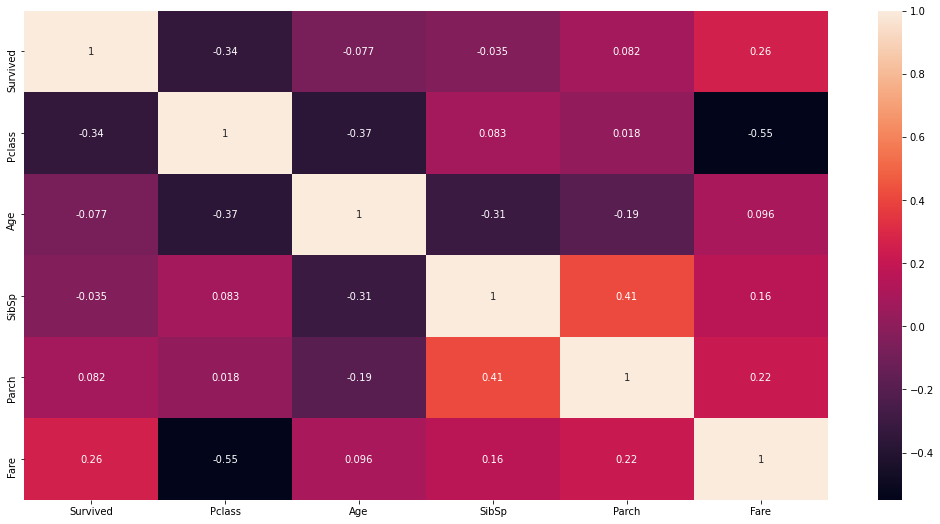

In [18]:
# Checking for correlation between the variables

plt.rcParams['figure.figsize'] = (18, 9)
sns.heatmap(df.corr(), annot = True)

No prominent correlation can be seen.

In [19]:
df['Age'].unique()

array([22.  , 38.  , 26.  , 35.  ,   nan, 54.  ,  2.  , 27.  , 14.  ,
        4.  , 58.  , 20.  , 39.  , 55.  , 31.  , 34.  , 15.  , 28.  ,
        8.  , 19.  , 40.  , 66.  , 42.  , 21.  , 18.  ,  3.  ,  7.  ,
       49.  , 29.  , 65.  , 28.5 ,  5.  , 11.  , 45.  , 17.  , 32.  ,
       16.  , 25.  ,  0.83, 30.  , 33.  , 23.  , 24.  , 46.  , 59.  ,
       71.  , 37.  , 47.  , 14.5 , 70.5 , 32.5 , 12.  ,  9.  , 36.5 ,
       51.  , 55.5 , 40.5 , 44.  ,  1.  , 61.  , 56.  , 50.  , 36.  ,
       45.5 , 20.5 , 62.  , 41.  , 52.  , 63.  , 23.5 ,  0.92, 43.  ,
       60.  , 10.  , 64.  , 13.  , 48.  ,  0.75, 53.  , 57.  , 80.  ,
       70.  , 24.5 ,  6.  ,  0.67, 30.5 ,  0.42, 34.5 , 74.  ])

In [20]:
# Function to categorise 'Age'

def age_bin(x):
    if x >= 1 and x <= 12:
        return '1 - 12'
    elif x > 12 and x <= 18:
        return '12 - 18'
    elif x > 18 and x <= 35:
        return '18 - 35'
    elif x > 35 and x <= 50:
        return '35 - 50'
    elif x > 50:
        return '50+'

In [21]:
df['Age'] = df['Age'].apply(age_bin)
df['Age'].value_counts()

18 - 35    358
35 - 50    153
12 - 18     70
50+         64
1 - 12      62
Name: Age, dtype: int64

In [22]:
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,18 - 35,1,0,A/5 21171,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,35 - 50,1,0,PC 17599,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,18 - 35,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,18 - 35,1,0,113803,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",male,18 - 35,0,0,373450,8.0500,NaN,S


In [23]:
df['Fare'].nunique()

248

In [24]:
df['Fare'].unique()

array([  7.25  ,  71.2833,   7.925 ,  53.1   ,   8.05  ,   8.4583,
        51.8625,  21.075 ,  11.1333,  30.0708,  16.7   ,  26.55  ,
        31.275 ,   7.8542,  16.    ,  29.125 ,  13.    ,  18.    ,
         7.225 ,  26.    ,   8.0292,  35.5   ,  31.3875, 263.    ,
         7.8792,   7.8958,  27.7208, 146.5208,   7.75  ,  10.5   ,
        82.1708,  52.    ,   7.2292,  11.2417,   9.475 ,  21.    ,
        41.5792,  15.5   ,  21.6792,  17.8   ,  39.6875,   7.8   ,
        76.7292,  61.9792,  27.75  ,  46.9   ,  80.    ,  83.475 ,
        27.9   ,  15.2458,   8.1583,   8.6625,  73.5   ,  14.4542,
        56.4958,   7.65  ,  29.    ,  12.475 ,   9.    ,   9.5   ,
         7.7875,  47.1   ,  15.85  ,  34.375 ,  61.175 ,  20.575 ,
        34.6542,  63.3583,  23.    ,  77.2875,   8.6542,   7.775 ,
        24.15  ,   9.825 ,  14.4583, 247.5208,   7.1417,  22.3583,
         6.975 ,   7.05  ,  14.5   ,  15.0458,  26.2833,   9.2167,
        79.2   ,   6.75  ,  11.5   ,  36.75  ,   7.7958,  12.5

In [25]:
df['Fare'].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

In [26]:
# Function to categorize 'Fair'

def fare_cat(x):
    if x > 0 and x <= 100:
        return 'Cheap'
    elif x > 100 and x <= 300:
        return 'Reasonable'
    elif x > 300 and x <= 600:
        return 'Expensive'

In [27]:
df['Fare'] = df['Fare'].apply(fare_cat)
df['Fare'].value_counts()

Cheap         823
Reasonable     50
Expensive       3
Name: Fare, dtype: int64

In [28]:
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,18 - 35,1,0,A/5 21171,Cheap,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,35 - 50,1,0,PC 17599,Cheap,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,18 - 35,0,0,STON/O2. 3101282,Cheap,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,18 - 35,1,0,113803,Cheap,C123,S
4,0,3,"Allen, Mr. William Henry",male,18 - 35,0,0,373450,Cheap,NaN,S


In [29]:
df['Name'].astype(str)

0                                Braund, Mr. Owen Harris
1      Cumings, Mrs. John Bradley (Florence Briggs Th...
2                                 Heikkinen, Miss. Laina
3           Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                               Allen, Mr. William Henry
                             ...                        
886                                Montvila, Rev. Juozas
887                         Graham, Miss. Margaret Edith
888             Johnston, Miss. Catherine Helen "Carrie"
889                                Behr, Mr. Karl Howell
890                                  Dooley, Mr. Patrick
Name: Name, Length: 891, dtype: object

In [30]:
# Separating address and name in 'Name' column

df['Name'] = df['Name'].str.split(',')
df['Name'] = df['Name'].apply(lambda x: x[1] if len(x) > 1 else x[0])

In [31]:
df.dtypes

Survived     int64
Pclass       int64
Name        object
Sex         object
Age         object
SibSp        int64
Parch        int64
Ticket      object
Fare        object
Cabin       object
Embarked    object
dtype: object

In [32]:
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,Mr. Owen Harris,male,18 - 35,1,0,A/5 21171,Cheap,NaN,S
1,1,1,Mrs. John Bradley (Florence Briggs Thayer),female,35 - 50,1,0,PC 17599,Cheap,C85,C
2,1,3,Miss. Laina,female,18 - 35,0,0,STON/O2. 3101282,Cheap,NaN,S
3,1,1,Mrs. Jacques Heath (Lily May Peel),female,18 - 35,1,0,113803,Cheap,C123,S
4,0,3,Mr. William Henry,male,18 - 35,0,0,373450,Cheap,NaN,S


In [33]:
# Separating unnecessary values in the bracket from name

df['Name'] = df['Name'].str.split('(')

In [34]:
df['Name'] = df['Name'].apply(lambda x: x[0])

In [35]:
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,Mr. Owen Harris,male,18 - 35,1,0,A/5 21171,Cheap,NaN,S
1,1,1,Mrs. John Bradley,female,35 - 50,1,0,PC 17599,Cheap,C85,C
2,1,3,Miss. Laina,female,18 - 35,0,0,STON/O2. 3101282,Cheap,NaN,S
3,1,1,Mrs. Jacques Heath,female,18 - 35,1,0,113803,Cheap,C123,S
4,0,3,Mr. William Henry,male,18 - 35,0,0,373450,Cheap,NaN,S


In [36]:
# Removing prefix (Mr., Mrs., etc.) from name

df['Name'] = df['Name'].str.split('.')
df['Name'] = df['Name'].apply(lambda x: x[1] if len(x) > 1 else x[0])

In [37]:
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,Owen Harris,male,18 - 35,1,0,A/5 21171,Cheap,NaN,S
1,1,1,John Bradley,female,35 - 50,1,0,PC 17599,Cheap,C85,C
2,1,3,Laina,female,18 - 35,0,0,STON/O2. 3101282,Cheap,NaN,S
3,1,1,Jacques Heath,female,18 - 35,1,0,113803,Cheap,C123,S
4,0,3,William Henry,male,18 - 35,0,0,373450,Cheap,NaN,S


In [38]:
# Removing characters other than ticket no. from ticket

df['Ticket'] = df['Ticket'].str.split(" ")
df['Ticket'] = df['Ticket'].apply(lambda x: x[1] if len(x) > 1 else x[0])

In [39]:
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,Owen Harris,male,18 - 35,1,0,21171,Cheap,NaN,S
1,1,1,John Bradley,female,35 - 50,1,0,17599,Cheap,C85,C
2,1,3,Laina,female,18 - 35,0,0,3101282,Cheap,NaN,S
3,1,1,Jacques Heath,female,18 - 35,1,0,113803,Cheap,C123,S
4,0,3,William Henry,male,18 - 35,0,0,373450,Cheap,NaN,S


In [40]:
df['Ticket'].nunique()

668

In [41]:
# Dropping ticket because of large variation

df = df.drop('Ticket', axis = 1)

In [42]:
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,Owen Harris,male,18 - 35,1,0,Cheap,NaN,S
1,1,1,John Bradley,female,35 - 50,1,0,Cheap,C85,C
2,1,3,Laina,female,18 - 35,0,0,Cheap,NaN,S
3,1,1,Jacques Heath,female,18 - 35,1,0,Cheap,C123,S
4,0,3,William Henry,male,18 - 35,0,0,Cheap,NaN,S


In [43]:
df['Cabin'].nunique()

147

In [44]:
df['Cabin'].unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [45]:
df['Cabin'].value_counts()

G6             4
C23 C25 C27    4
B96 B98        4
F33            3
E101           3
              ..
D19            1
E49            1
C49            1
D11            1
E68            1
Name: Cabin, Length: 147, dtype: int64

In [49]:
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,Owen Harris,male,18 - 35,1,0,Cheap,NaN,S
1,1,1,John Bradley,female,35 - 50,1,0,Cheap,NaN,C
2,1,3,Laina,female,18 - 35,0,0,Cheap,NaN,S
3,1,1,Jacques Heath,female,18 - 35,1,0,Cheap,NaN,S
4,0,3,William Henry,male,18 - 35,0,0,Cheap,NaN,S
